# Sprint 7: S07 T01: Tasca del test d'hipòtesis

## Nivell 1
### Exercici 1
#### Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [4]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
#import statsmodels.api as sm
#import pingouin as pg
from scipy import stats
import random as rd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Test Estadísticos
# ==============================================================================
from scipy.stats import pearsonr
from statistics import mode
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import f_oneway
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare

# Ajuste de distribuciones
# ==============================================================================
from scipy import stats
import inspect
from statsmodels.distributions.empirical_distribution import ECDF


# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

#### Data Frame

##### Para realizar este Sprint he seleccionado la información contenida en la página web: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results
##### En la web se encuentra disponible la base de datos histórica de los juegos olímpicos de verano e invierno: Athens 1896 - Rio 2016

In [5]:
df_atletas= pd.read_csv(r"C:\Users\hecto\OneDrive\Documentos\IT Data Science\Sprint5\archive_olimpics\athlete_events.csv")

In [6]:
df_atletas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


##### Detalle de los campos:
##### El archivo atleta_eventos.csv contiene 271116 filas y 15 columnas. Cada fila corresponde a un atleta individual compitiendo en un evento olímpico.
###### ID - Unique number for each athlete
###### Name - Athlete's name
###### Sex - M or F
###### Age - Integer;
###### Height - In centimeters
###### Weight - In kilograms
###### Team - Team name
###### NOC - National Olympic Committee 3-letter code
###### Games - Year and season
###### Year - Integer
###### Season - Summer or Winter
###### City - Host city
###### Sport - Sport
###### Event - Event
###### Medal - Gold, Silver, Bronze, or NA.

In [7]:
df_atletas.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [11]:
df_atletas_pre = df_atletas
df_atletas_pre.fillna(0, inplace=True)

In [12]:
df_atletas_ok = df_atletas_pre[(df_atletas_pre['Age']>0)&(df_atletas_pre['Height']>0) & (df_atletas_pre['Weight'] > 0)]

In [13]:
df_atletas_ok.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206165 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      206165 non-null  int64  
 1   Name    206165 non-null  object 
 2   Sex     206165 non-null  object 
 3   Age     206165 non-null  float64
 4   Height  206165 non-null  float64
 5   Weight  206165 non-null  float64
 6   Team    206165 non-null  object 
 7   NOC     206165 non-null  object 
 8   Games   206165 non-null  object 
 9   Year    206165 non-null  int64  
 10  Season  206165 non-null  object 
 11  City    206165 non-null  object 
 12  Sport   206165 non-null  object 
 13  Event   206165 non-null  object 
 14  Medal   206165 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 25.2+ MB


In [14]:
df_atletas_ok.describe()

,ID,Age,Height,Weight,Year
count,206165.000000,206165.000000,206165.000000,206165.000000,206165.000000
mean,68616.017675,25.055509,175.371950,70.688337,1989.674678
std,38996.514355,5.483096,10.546088,14.340338,20.130865
min,1.000000,11.000000,127.000000,25.000000,1896.000000
25%,35194.000000,21.000000,168.000000,60.000000,1976.000000
50%,68629.000000,24.000000,175.000000,70.000000,1992.000000
75%,102313.000000,28.000000,183.000000,79.000000,2006.000000
max,135571.000000,71.000000,226.000000,214.000000,2016.000000


#### A. Normality Test

#### A.1 Shapiro-Wilk Normality Test

El test de Shapiro-Wilk es un contraste de ajuste que se utiliza para comprobar si unos datos determinados (X1, X2,…, Xn) han sido extraídos de una población normal.
Los parámetros de la distribución no tienen porqué ser conocidos y es adecuado para muestras pequeñas (n<50).
En nuestro caso vamos a extraer una muestra de 500 atletas ya que el Data Frame original es muy grande 206.165 atletas en total, para tener suficientes elemnetos de los diferentes atributos que queremos analizar.

In [15]:
data= df_atletas_ok.sample(500, replace=True, random_state=261)

In [16]:
data.describe()

,ID,Age,Height,Weight,Year
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,69686.128000,24.934000,175.468000,70.590000,1989.260000
std,38394.913658,5.647427,10.165809,13.598225,20.248269
min,90.000000,13.000000,143.000000,38.000000,1904.000000
25%,35828.500000,21.000000,169.000000,62.000000,1976.000000
50%,69968.500000,24.000000,176.000000,70.000000,1992.000000
75%,101335.250000,28.000000,182.000000,78.000000,2004.000000
max,135257.000000,53.000000,214.000000,148.000000,2016.000000


In [17]:
print("Diferencia entre la media población - media de la muestra en %")
print("Edad: " , (df_atletas_ok.Age.mean()- data.Age.mean())/df_atletas_ok.Age.mean()) 
print("Height: " , (df_atletas_ok.Height.mean()- data.Height.mean())/df_atletas_ok.Height.mean()) 
print("Weight: " , (df_atletas_ok.Weight.mean()- data.Weight.mean())/df_atletas_ok.Weight.mean()) 

Diferencia entre la media población - media de la muestra en %
Edad:  0.0048495896579833645
Height:  -0.0005476950459455635
Weight:  0.0013911348855292051


In [18]:
print("Diferencia entre la desviación estándar de la población - desv.estd de la muestra en %")
print("Edad: " ,(df_atletas_ok.Age.std()-data.Age.std())/df_atletas_ok.Age.std())
print("Height: " ,(df_atletas_ok.Height.std()-data.Height.std())/df_atletas_ok.Height.std())
print("Weight: " ,(df_atletas_ok.Weight.std()-data.Weight.std())/df_atletas_ok.Weight.std())

Diferencia entre la desviación estándar de la población - desv.estd de la muestra en %
Edad:  -0.029970478940901095
Height:  0.0360588265911543
Weight:  0.05175002937164425


In [19]:
print("===============================")
print("  Shapiro-Wilk Normality Test  ")
print("===============================")
#from scipy.stats import shapiro
data_H = data["Height"]
stat, p = shapiro(data_H)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

  Shapiro-Wilk Normality Test  
stat=0.995, p=0.104
Probably Gaussian


##### El resultado de la p-value de la muestra de los datos relativos a la altura de los atletas nos da un valor superior al 0.05 que hemos establecido como nivel de significación, por tanto se acepta la Ho (hipótesis nula) de que la distribución de la variable altura de los atletas (Height) se comporta como una normal. 

#### A.1.1 Ajustes Gráficos a la Distribución Normal

##### A.1.1 a) Funcion Kerenel Density Estimation

<AxesSubplot:xlabel='Height', ylabel='Density'>

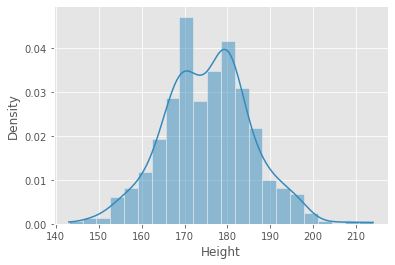

In [20]:
sns.histplot(data = data_H, stat="density",kde=True,common_norm=True)

##### En estadística, kernel density estimation (KDE), es un método no paramétrico que permite estimar la función de densidad de probabilidad de una variable aleatoria a partir de un número finito de observaciones (muestra).
##### Fué propuesto por Fix y Hodges (1951) y Rosenblatt (1956): Dado un valor  xi  la función aprendida por el kernel density estimator devuelve la densidad de la distribución en el punto  xi . Esta densidad, cuyo valor está acotado al rango [0, + ∞ ], es una medida relativa de verosimilitud (likelihood). Si la densidad para el punto A es mayor que la de B, significa que la probabilidad de que A pertenezca a la distribución es mayor que la de B.
##### Con frecuencia, para facilitar los cálculos, en lugar de utilizar el valor de densidad se utiliza el su logaritmo, aun así, la interpretación es la misma, cuanto mayor su valor, mayor la evidencia de que la observación pertenece a la distribución.
##### El ajuste de la funcion KDE nos permite verificar que la distribución de la variable altura de los atletas de la muestra se ajusta a una Normal.

##### A.1.1. b) Q-Q Plot Normal

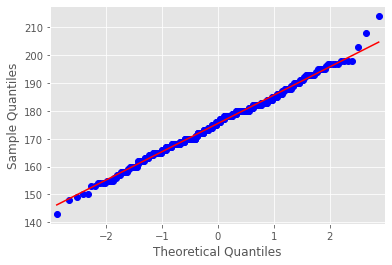

In [21]:
# q-q plot
qqplot(data_H, line='s')
pyplot.show()

##### El gráficos de probabilidad normal o Q-Q Plot Normal, nos permite comparar la distribución empírica de un conjunto de datos con la distribución Normal. Por tanto, dicho gráfico se puede considerar como una técnica gráfica para la prueba de normalidad de un conjunto de datos.
##### En nuestro caso, la distribución de la variable altura de la muestra se obseva que se ajusta a la normalidad en casi todo el rango, salvo en los datos que superan la altura de 2 metros, que tienden a separarse de la linea de datos normalizada.


##### A.1.1 c) Ajuste a la Distribución Normal

In [22]:
datos=data_H

---------------------
Resultados del ajuste
---------------------
Distribución:   gamma
Dominio:        [0.0, inf]
Parámetros:     {'a': 1291.8427042042258, 'loc': -189.5718238097595, 'scale': 0.28257197981109683}


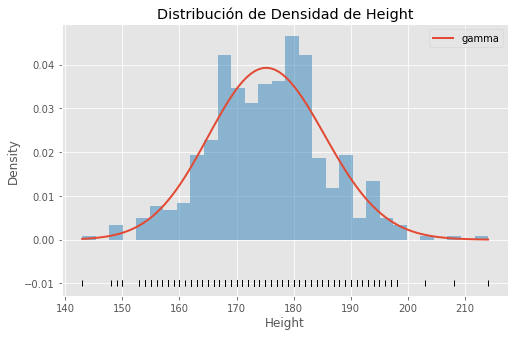

In [23]:
# Ajuste distribución normal
#===============================================================================
# 1) Se define el tipo de distribución
distribucion = stats.gamma

# 2) Con el método fit() se obtienen los parámetros
parametros = distribucion.fit(data=datos)

# 3) Se crea un diccionario que incluya el nombre de cada parámetro
nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                     if not p=='x'] + ["loc","scale"]
parametros_dict = dict(zip(nombre_parametros, parametros))

# 3) Se calcula el log likelihood
log_likelihood = distribucion.logpdf(datos.to_numpy(), *parametros).sum()

# 4) Se calcula el AIC y el BIC
aic = -2 * log_likelihood + 2 * len(parametros)
bic = -2 * log_likelihood + np.log(datos.shape[0]) * len(parametros)

# 5) Gráfico
x_hat = np.linspace(min(datos), max(datos), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=datos, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(datos, np.full_like(datos, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución de Densidad de Height')
ax.set_xlabel('Height')
ax.set_ylabel('Density')
ax.legend();

#6) Información del ajuste
print('---------------------')
print('Resultados del ajuste')
print('---------------------')
print(f"Distribución:   {distribucion.name}")
print(f"Dominio:        {[distribucion.a, distribucion.b]}")
print(f"Parámetros:     {parametros_dict}")


##### Como se puede observar en el gráfico los datos de la distribución de la Altura se ajustan a una Gamma Normal.

#### A.2 D'Agostino's K^2 Normality Test

La prueba K 2 de D'Agostino, es una medida de bondad de ajuste de la desviación de la normalidad , es decir, la prueba tiene como objetivo establecer si la muestra dada proviene o no de una población distribuida normalmente. La prueba se basa en transformaciones de la curtosis y la asimetría de la muestra , y solo tiene poder frente a las alternativas de que la distribución sea sesgada y / o kurtica.

In [24]:
print("===================================")
print("  D'Agostino's K^2 Normality Test  ")
print("===================================")
#from scipy.stats import normaltest
data_W = data["Weight"]
stat, p = normaltest(data_W)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

  D'Agostino's K^2 Normality Test  
stat=81.359, p=0.000
Probably not Gaussian


##### El resultado de la p-value de la muestra de los datos relativos al peso de los atletas nos da un valor inferior al 0.05 que hemos establecido como nivel de significación , por tanto se rechaza la Ho (hipótesis nula) de que la distribución de la variable peso de los atletas (Weight) se comporta como una normal. 

#### B.1.1 Ajustes Gráficos a la Distribución Normal

##### B.1.1 a) Funcion Kerenel Density Estimation

<AxesSubplot:xlabel='Weight', ylabel='Density'>

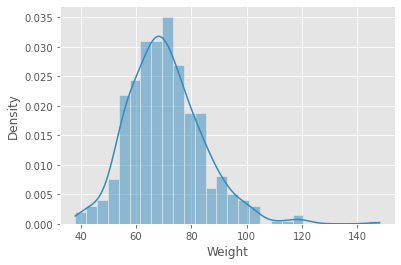

In [25]:
sns.histplot(data = data_W, stat="density",kde=True,common_norm=True)

##### La función KDE nos muestra que existen valores en la cola derecha de la distribución que distorsionan el ajuste a la normal, puede deberse a datos reales, ya que hay discipinas deportivas que exigen o collevan un peso elevado de los atletas, outliers o datos erróneos.

##### B.1.1. b) Q-Q Plot Normal

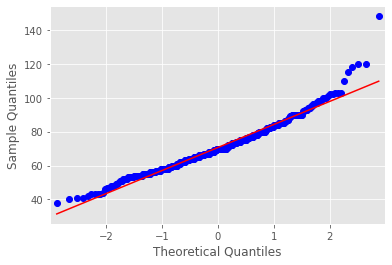

In [26]:
# q-q plot
qqplot(data_W, line='s')
pyplot.show()

##### El mismo caso se da cuando analizamos el Q-Q plot, de los datos del peso de la muestra, con la distribución normal. Se producen diferencias entre la distribución del peso y la normal conforme el peso supera los 100 kg.

##### A.1.1 c) Ajuste a la Distribución Normal

---------------------
Resultados del ajuste
---------------------
Distribución:   norm
Dominio:        [-inf, inf]
Parámetros:     {'loc': 70.59, 'scale': 13.584619979962635}


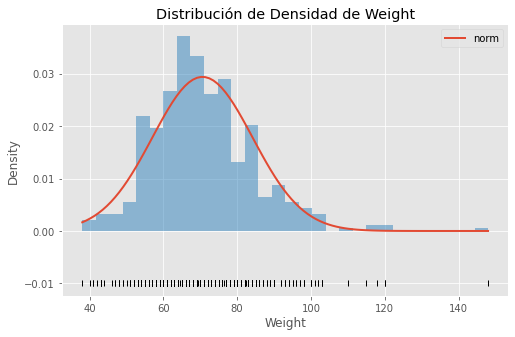

In [27]:
# Ajuste distribución normal
#===============================================================================
# 1) Se define el tipo de distribución
distribucion = stats.norm

# 2) Con el método fit() se obtienen los parámetros
parametros = distribucion.fit(data=data_W)

# 3) Se crea un diccionario que incluya el nombre de cada parámetro
nombre_parametros = [p for p in inspect.signature(distribucion._pdf).parameters \
                     if not p=='x'] + ["loc","scale"]
parametros_dict = dict(zip(nombre_parametros, parametros))

# 3) Se calcula el log likelihood
log_likelihood = distribucion.logpdf(data_W.to_numpy(), *parametros).sum()

# 4) Se calcula el AIC y el BIC
aic = -2 * log_likelihood + 2 * len(parametros)
bic = -2 * log_likelihood + np.log(data_W.shape[0]) * len(parametros)

# 5) Gráfico
x_hat = np.linspace(min(data_W), max(data_W), num=100)
y_hat = distribucion.pdf(x_hat, *parametros)
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x_hat, y_hat, linewidth=2, label=distribucion.name)
ax.hist(x=data_W, density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(data_W, np.full_like(data_W, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución de Densidad de Weight')
ax.set_xlabel('Weight')
ax.set_ylabel('Density')
ax.legend();

#6) Información del ajuste
print('---------------------')
print('Resultados del ajuste')
print('---------------------')
print(f"Distribución:   {distribucion.name}")
print(f"Dominio:        {[distribucion.a, distribucion.b]}")
print(f"Parámetros:     {parametros_dict}")


##### Cuando se ajustan los datos de peso a la función normal, vemos que los datos superiores a 100 kg, alargan la cola de la distribución hacia la deerecha, lo que rompe la simetría propia de la normal.
##### Un análisis de dichos datos permitiría conocer si se trata de outliers o datos erróneos, y ajustar si procede dicha inforación para aproximarse a la normal.

#### A.3 Anderson-Darling Normality Test

El estadístico Anderson-Darling mide en qué grado siguen los datos de una muestra una distribución específica. Para un conjunto de datos y distribución en particular, mientras mejor se ajuste la distribución a los datos, menor será este estadístico.

In [28]:
print("===================================")
print("  Anderson-Darling Normality Test  ")
print("===================================")
#from scipy.stats import anderson
data_H = data["Weight"]
result = anderson(data_H)
print('stat=%.3f' % (result.statistic))
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probably Gaussian at the %.1f%% level' % (sl))
    else:
        print('Probably not Gaussian at the %.1f%% level' % (sl))

  Anderson-Darling Normality Test  
stat=2.750
Probably not Gaussian at the 15.0% level
Probably not Gaussian at the 10.0% level
Probably not Gaussian at the 5.0% level
Probably not Gaussian at the 2.5% level
Probably not Gaussian at the 1.0% level


##### El estadístico Anderson-Darling Normality señala que a pesar de que se ha reducido el nivel de significación, el valor de p value es suficientemente bajo como para rechazar la Ho nula de que los datos analizados, en este caso el peso de los atletas, sigue una distribución de probabilidad normal.

## Nivell 2
### Exercici 2
#### Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%

#### B. CORRELATION TEST 

#### B.1 Pearson's Correlation test

El coeficiente de correlación de Pearson es una medida de dependencia lineal entre dos variables aleatorias cuantitativas.
A diferencia de la covarianza, la correlación de Pearson es independiente de la escala de medida de las variables.
También podemos definir el coeficiente de correlación de Pearson como un índice que puede utilizarse para medir el grado de relación de dos variables siempre y cuando ambas sean cuantitativas y continuas.

In [29]:
print("==============================")
print("  Pearson's Correlation test  ")
print("==============================")
#from scipy.stats import pearsonr
data1 = data["Height"]
data2 = data["Weight"]
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

  Pearson's Correlation test  
stat=0.787, p=0.000
Probably dependent


#### B.1. a) Gráfico de datos: Relación entre Peso y Altura de la muestra

<AxesSubplot:xlabel='Weight', ylabel='Height'>

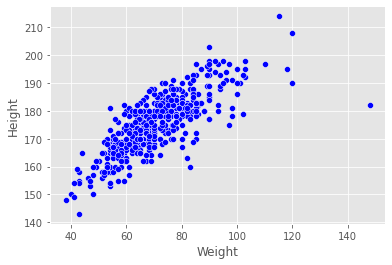

In [30]:
sns.scatterplot(data=data, x=data2, y=data1, color="blue")

##### En el caso de las variables Altura y Peso, ya vimos en el Sprint 6 que existía una fuerte correlación entre ambas a nivel poblacional, y que se mantiene en el caso de la muestra analizada sobre 500 elementos elegidos aleatoriamente.
##### Vamos a analizar si se cumple dicha correlación o dependencia, cuando analizamos los diferenetes subgrupos de la muestra,en función de los atributos de "Sex" (Masculino y Femenino) y "Season" (Juegos de Verano y Juegos de Invierno).

#### B.1.1 Correlación Peso y Altura - Juegos de Invierno Masculinos

In [31]:
male= data.loc[:,'Sex'] == 'M'
df_male= data.loc[male]
winter= df_male.loc[:,'Season']=='Winter'
df_male_winter_H= df_male.Height.loc[winter]
df_male_winter_W= df_male.Weight.loc[winter]

In [32]:
data1 = df_male_winter_H
data2 = df_male_winter_W
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
rdos = np.empty((0,2), int)
rdos = np.append(rdos, np.array([[stat,p]]), axis=0)

if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.697, p=0.000
Probably dependent


#### B.1.2 Correlación Peso y Altura - Juegos de Verano Masculinos

In [33]:
male= data.loc[:,'Sex'] == 'M'
df_male= data.loc[male]
summer= df_male.loc[:,'Season']=='Summer'
df_male_summer_H= df_male.Height.loc[summer]
df_male_summer_W= df_male.Weight.loc[summer]

In [34]:
data1 = df_male_summer_H
data2 = df_male_summer_W
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
rdos = np.append(rdos, np.array([[stat,p]]), axis=0)
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.727, p=0.000
Probably dependent


#### B.1.3 Correlación Peso y Altura - Juegos de Inviernos Femeninos

In [35]:
female= data.loc[:,'Sex'] == 'F'
df_female= data.loc[female]
winter= df_female.loc[:,'Season']=='Winter'
df_female_winter_H= df_female.Height.loc[winter]
df_female_winter_W= df_female.Weight.loc[winter]

In [36]:
data1 = df_female_winter_H
data2 = df_female_winter_W
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
rdos = np.append(rdos, np.array([[stat,p]]), axis=0)

if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.626, p=0.000
Probably dependent


#### B.1.4 Correlación Peso y Altura - Juegos de Verano Femeninos

In [37]:
female= data.loc[:,'Sex'] == 'F'
df_female= data.loc[female]
summer= df_female.loc[:,'Season']=='Summer'
df_female_summer_H= df_female.Height.loc[summer]
df_female_summer_W= df_female.Weight.loc[summer]

In [38]:
data1 = df_female_summer_H
data2 = df_female_summer_W
stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
rdos = np.append(rdos, np.array([[stat,p]]), axis=0)

if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.764, p=0.000
Probably dependent


#### B.1.5 Resumen de Correlaciones:

In [39]:
print( "          Pearson's Correlation test:                    Valor del Estadístico -  p-value ")
print("___________________________________________________________________________________________")
print(" Correlación Altura-Peso: Juegos Verano Masculinos  : ", rdos[1,0], "  -  ",rdos[1,1])
print(" Correlación Altura-Peso: Juegos Invierno Masculinos: ", rdos[0,0], "  -  ",rdos[0,1])
print(" Correlación Altura-Peso: Juegos Verano Femeninos   : ", rdos[3,0], "  -  ",rdos[3,1])
print(" Correlación Altura-Peso: Juegos Invierno Femeninos : ", rdos[2,0], "  -  ",rdos[2,1])

          Pearson's Correlation test:                    Valor del Estadístico -  p-value 
___________________________________________________________________________________________
 Correlación Altura-Peso: Juegos Verano Masculinos  :  0.7268875190362967   -   9.035673970496928e-48
 Correlación Altura-Peso: Juegos Invierno Masculinos:  0.6972996626999348   -   1.1926030002617494e-09
 Correlación Altura-Peso: Juegos Verano Femeninos   :  0.7637650975363468   -   9.358021937006523e-25
 Correlación Altura-Peso: Juegos Invierno Femeninos :  0.6262482615495342   -   4.398006808726472e-05


#### B.1.6 Gráfico de Correlaciones por Juegos (Summer - Winter) y Sexo (M- masculinos, F- Femeninos)

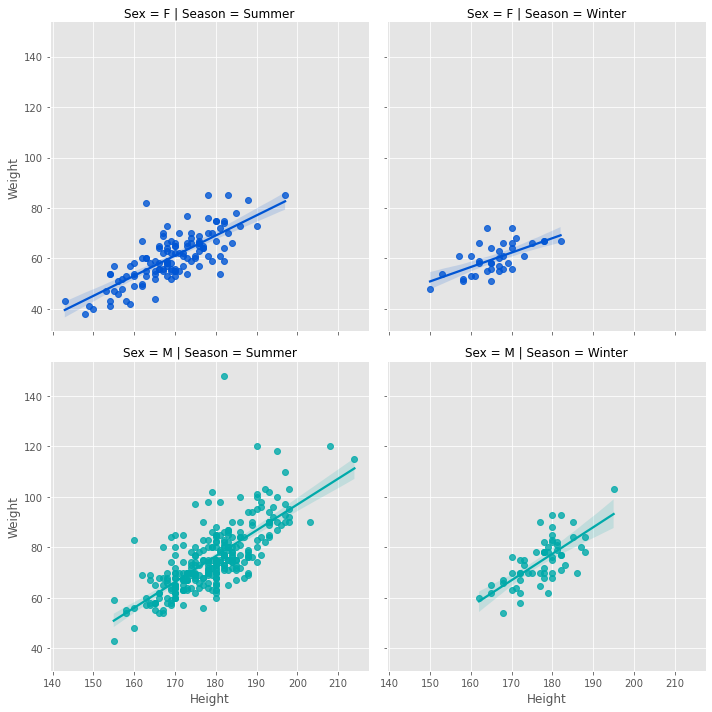

In [40]:
sns.lmplot(x = "Height", y = "Weight", data = data, hue = "Sex",palette="winter", col="Season",row="Sex")

##### En los cuatro subgrupos el valor del estadístico es elevado y la p-value inferior al nivel de confianza predefinido, por lo que se acepta la Ho nula de que ambas variables (Peso y Altura) están correlacionada o existe una clara dependencia.

#### B.2 Spearman's Rank Correlation Test

La correlación de Spearman es una correlación no paramétrica también conocida como coeficientes de correlación basados en rangos.
El coeficiente de correlación de Spearman es recomendable utilizarlo cuando los datos presentan valores extremos, ya que dichos valores afectan mucho el coeficiente de correlación de Pearson, o ante distribuciones no normales.
No está afectada por los cambios en las unidades de medida.

In [41]:
print("====================================")
print("  Spearman's Rank Correlation Test  ")
print("====================================")
#from scipy.stats import spearmanr
data1 = data["Weight"]
data2 = data["Height"]
stat, p = spearmanr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

  Spearman's Rank Correlation Test  
stat=0.791, p=0.000
Probably dependent


#### B.3 Kendall's Rank Correlation Test

Cuando se estudia la relación entre variables cualitativas de tipo ordinal se debe utiliza el coeficiente de correlación de rangos de Kendall (1938), denominado  (tau) de Kendall, del cual existen dos variantes tau-b y tau-c.
Su aplicación tiene sentido tambien, si las variables objeto de estudio  no  poseen  una  distribución  poblacional  conjunta  normal;  es  decir,  si  se  requiere determinar el grado de asociación lineal entre dos variables cuantitativas pero las mismas no siguen un comportamiento normal, será preferible estimar este indicador mediante el coeficiente de  Kendall.

In [42]:
print("===================================")
print("  Kendall's Rank Correlation Test  ")
print("===================================")
#from scipy.stats import kendalltau
data1 = data["Weight"]
data2 = data["Height"]
stat, p = kendalltau(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

  Kendall's Rank Correlation Test  
stat=0.619, p=0.000
Probably dependent


##### El coeficiente de Kendall reporta por regla general valores más bajos con respecto a los coeficientes de Spearman y Pearson, pero en este caso valida la Ho nula de la existencia de correlación o dependencia entre las variables Altura y Peso de la muestra.

#### B.4 Chi-Squared Test"

La prueba chi-cuadrado es una de las más conocidas y utilizadas para analizar variables nominales o cualitativas, es decir, para determinar la existencia o no de independencia entre dos variables.
Que dos variables sean independientes significa que no tienen relación, y que por lo tanto una no depende de la otra, ni viceversa.
El estudio de la independencia de dos variables, genera una métodología para verificar si las frecuencias observadas en cada categoría son compatibles con la independencia entre ambas variables.

In [43]:
print("===================================")
print("       Chi-Squared Test            ")
print("===================================")
from scipy.stats import chi2_contingency
table = [data["Age"],data["Height"]]
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

       Chi-Squared Test            
stat=537.959, p=0.111
Probably independent


#### B.4. a) Gráfico de datos: Relación de independencia entre Altura y Edad de la muestra

<AxesSubplot:xlabel='Age', ylabel='Height'>

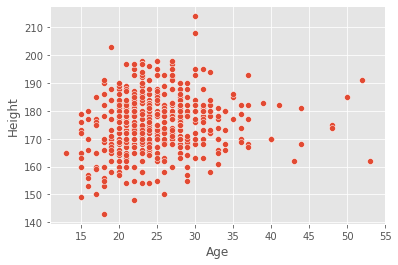

In [44]:
sns.scatterplot(data=data, x="Age", y="Height")

##### El p-value del test de la Chi- Cuadrado para las variables Altura y Edad de los deportistas de la muestra, arroja un valor superior al nivel de significación establecido y por lo tanto, se acepta la Ho nula de independencia entre ambas variables.

##### En el caso de las variables Altura y Edad, ya vimos en el Sprint 6 que no existía una fuerte correlación entre ambas a nivel poblacional, y que se mantiene en el caso de la muestra analizada sobre 500 elementos elegidos aleatoriamente.
##### Vamos a analizar si se cumple dicha independencia, cuando analizamos los diferenetes subgrupos de la muestra,en función de los atributos de "Sex" (Masculino y Femenino) y "Season" (Juegos de Verano y Juegos de Invierno).

#### B.4.1 Correlación Edad y Altura - Juegos de Verano Masculinos

In [45]:
male= data.loc[:,'Sex'] == 'M'
df_male= data.loc[male]
summer= df_male.loc[:,'Season']=='Summer'
df_male_summer_H= df_male.Height.loc[summer]
df_male_summer_A= df_male.Age.loc[summer]
winter= df_male.loc[:,'Season']=='Winter'
df_male_winter_H= df_male.Height.loc[winter]
df_male_winter_A= df_male.Age.loc[winter]

In [46]:
data1 = df_male_summer_H
data2 = df_male_summer_A
table = [data1,data2]
stat, p, dof, expected = chi2_contingency(table)
rdos_chi2 = np.empty((0,2), int)
rdos_chi2 = np.append(rdos_chi2, np.array([[stat,p]]), axis=0)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=333.941, p=0.018
Probably dependent


#### B.4.2 Correlación Edad y Altura - Juegos de Invierno Masculinos

In [47]:
data1 = df_male_winter_H
data2 = df_male_winter_A
table = [data1,data2]
stat, p, dof, expected = chi2_contingency(table)
rdos_chi2 = np.append(rdos_chi2, np.array([[stat,p]]), axis=0)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=41.953, p=0.932
Probably independent


#### B.4.3 Correlación Edad y Altura - Juegos de Verano Femeninos

In [48]:
female= data.loc[:,'Sex'] == 'F'
df_female= data.loc[female]
summer= df_female.loc[:,'Season']=='Summer'
df_female_summer_H= df_female.Height.loc[summer]
df_female_summer_A= df_female.Age.loc[summer]
winter= df_female.loc[:,'Season']=='Winter'
df_female_winter_H= df_female.Height.loc[winter]
df_female_winter_A= df_female.Age.loc[winter]

In [49]:
data1 = df_female_summer_H
data2 = df_female_summer_A
table = [data1,data2]
stat, p, dof, expected = chi2_contingency(table)
rdos_chi2 = np.append(rdos_chi2, np.array([[stat,p]]), axis=0)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=124.020, p=0.432
Probably independent


#### B.4.4 Correlación Edad y Altura - Juegos de Invierno Femeninos

In [50]:
data1 = df_female_winter_H
data2 = df_female_winter_A
table = [data1,data2]
stat, p, dof, expected = chi2_contingency(table)
rdos_chi2 = np.append(rdos_chi2, np.array([[stat,p]]), axis=0)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=35.105, p=0.463
Probably independent


#### B.4.5 Resumen de valores:

In [51]:
print( "            Chi-Squared Test   :                Valor del Estadístico -  p-value ")
print("__________________________________________________________________________________")
print("Altura-Edad: Juegos Verano Masculinos   : ", rdos_chi2[0,0], "  -  ",rdos_chi2[0,1])
print("Altura-Edad: Juegos Invierno Masculinos : ", rdos_chi2[1,0], "  -  ",rdos_chi2[1,1])
print("Altura-Edad: Juegos Verano Femeninos    : ", rdos_chi2[2,0], "  -  ",rdos_chi2[2,1])
print("Altura-Edad: Juegos Invierno Femeninos  : ", rdos_chi2[3,0], "  -  ",rdos_chi2[3,1])

            Chi-Squared Test   :                Valor del Estadístico -  p-value 
__________________________________________________________________________________
Altura-Edad: Juegos Verano Masculinos   :  333.94147437952677   -   0.018160175986273817
Altura-Edad: Juegos Invierno Masculinos :  41.95252228917618   -   0.9322620974993638
Altura-Edad: Juegos Verano Femeninos    :  124.01997718148507   -   0.43201513279405523
Altura-Edad: Juegos Invierno Femeninos  :  35.10450642967809   -   0.46325076170709356


#### B.4.6 Gráfico de Correlaciones por Juegos (Summer - Winter) y Sexo (M- masculinos, F- Femeninos)

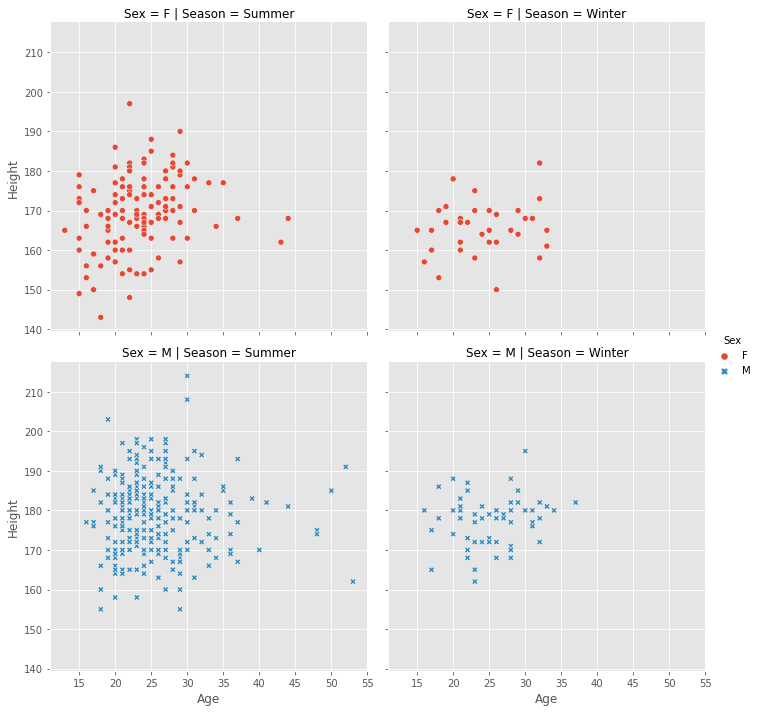

In [52]:
sns.relplot(data=data, x="Age", y="Height",col="Season",row= "Sex", hue="Sex", style="Sex",kind="scatter")

##### En tres de los cuatro subgrupos analizados  (atletas femeninas - juegos de invierno y verano y atletas masculinos - juegos de invierno), el valor del p-value es inferior al nivel de significación y por tanto se acepta la hipótesis de independencia de las variables Edad y Altura.
##### Sin embargo, para el subrupo de atletas masculinos y juegos de verano, el p-value es inferior al nivel de significación y el test rechaza la hipótesis de independencia de dichas variables.

#### C. PARAMETRIC STATISTICAL HYPOTHESIS TEST 

#### C.1 Student's t-test

Un t-test de Student es una herramienta para evaluar las medias de uno o dos grupos mediante pruebas de hipótesis.
Una prueba t puede usarse para determinar si un único grupo difiere de un valor conocido (una prueba t de una muestra) o bien, si dos grupos difieren entre sí (prueba t de muestras independientes), y finalmente si hay una diferencia significativa en medidas pareadas (una prueba t de muestras dependientes)
En nuestro caso vamos a comparar si la variable Altura tiene la misma o diferente distribución para los atletas de Sexo Masculino y Femenino

In [53]:
print("====================")
print("  Student's t-test  ")
print("====================")
#from scipy.stats import ttest_ind
male= data.loc[:,'Sex'] == 'M'
data1 = data.Height.loc[male]
female= data.loc[:,'Sex'] == 'F'
data2 = data.Height.loc[female]
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

  Student's t-test  
stat=11.800, p=0.000
Probably different distributions


#### C.1. a) Gráfico de datos: Comparación de distribuciones de la muestras de la Altura por Sexos

<AxesSubplot:title={'center':'Sex = F'}, xlabel='Height', ylabel='Density'>

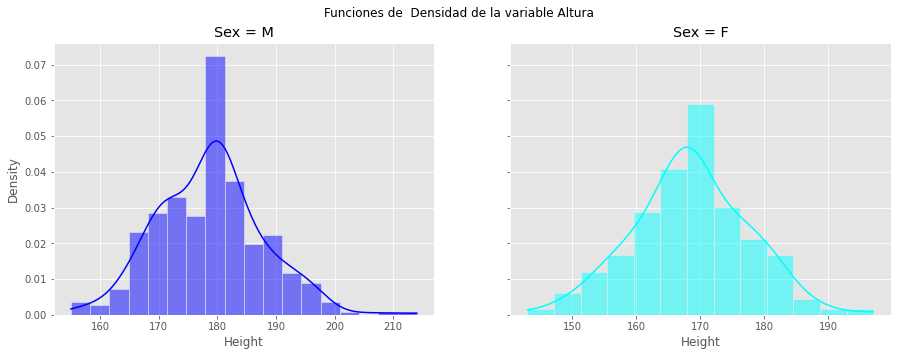

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Funciones de  Densidad de la variable Altura')
axes[0].set_title("Sex = M")
sns.histplot(ax= axes[0], data = data1, stat="density", kde = True, color ="blue")
axes[1].set_title("Sex = F")
sns.histplot(ax= axes[1], data = data2, stat="density", kde = True, color="cyan")

##### El resultado de la t-Student señala una p-value iferior al nivel de significación y por tanto se acepta la hipóteis de que las dos variables tienen funciones de distribución diferentes.

#### C.2 Paired Student's t-test

La prueba t-pareada es un método que se usa para comprobar si la media entre pares de muestras es o no igual a cero
Se usa esta prueba cuando sus valores correspondan a medidas emparejadas y la distribución de diferencias entre muestras emparejadas debe tener una distribución normal.

##### Dado que para aplicar este test es necesario contar con el mismo número de elementos de las muestras comparadas, hemos generado dos muestras de 500 elementos cada una en función de la variable Sexo.

In [55]:
male= df_atletas_ok.loc[:,'Sex'] == 'M'
data_male = df_atletas_ok.Height.loc[male]
female= df_atletas_ok.loc[:,'Sex'] == 'F'
data_female = df_atletas_ok.Height.loc[female]

In [56]:
df=data_male
simple_rand_M = df.sample(500, replace=True, random_state=261)
df=data_female
simple_rand_F = df.sample(500, replace=True, random_state=261)

In [57]:
print("===========================")
print("  Paired Student's t-test  ")
print("===========================")
from scipy.stats import ttest_rel
data1 = simple_rand_M
data2 = simple_rand_F

stat, p = ttest_rel(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


  Paired Student's t-test  
stat=18.574, p=0.000
Probably different distributions


#### C.2. a) Gráfico de datos: Comparación de distribuciones de la muestras de la Altura por Sexos

<AxesSubplot:title={'center':'Sex = F'}, xlabel='Height', ylabel='Density'>

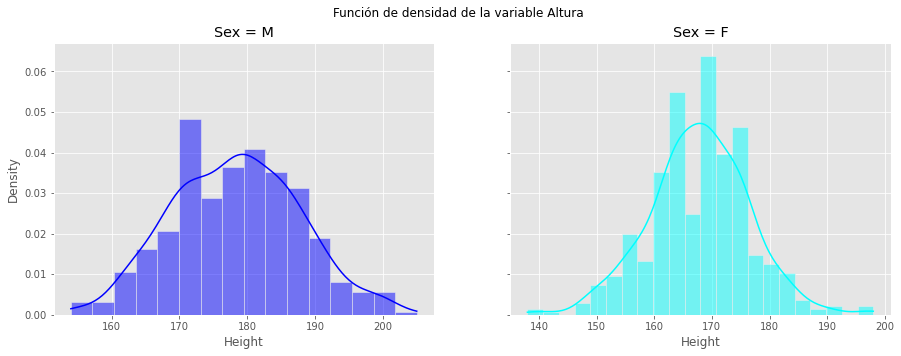

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Función de densidad de la variable Altura')
axes[0].set_title("Sex = M")
sns.histplot(ax= axes[0], data = data1, stat="density", kde = True, color="blue")
axes[1].set_title("Sex = F")
sns.histplot(ax= axes[1], data = data2, stat="density", kde = True, color="cyan")

##### El resultado del p-value es inferior al nivel de significación, igual que en el caso anterior y se rechaza la Ho nula, dado que las funciones de distribución son diferentes 

# Nivell 3
## Exercici 3
### Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

#### C.3 Analysis of Variance Test - ANOVA"

El análisis de la varianza permite contrastar la hipótesis nula de que las medias de K poblaciones (K >2) son iguales, frente a la hipótesis alternativa de que por lo menos una de las poblaciones difiere de las demás en cuanto a su valor esperado.

##### En nuestros caso vamos a seleccionar tres muestras de igual dimensión "500 altetas", clasificados en función de si han obtenido medallas, que se corresponden con tres atributos: Oro, Plata y Bronce.

In [59]:
gold= df_atletas_ok.loc[:,'Medal'] == 'Gold'
data1 = df_atletas_ok.Height.loc[gold]
silver= df_atletas_ok.loc[:,'Medal'] == 'Silver'
data2 = df_atletas_ok.Height.loc[silver]
bronce=df_atletas_ok.loc[:,'Medal'] == 'Bronze'
data3 = df_atletas_ok.Height.loc[bronce]

In [60]:
df=data1
simple_rand_gold = df.sample(500, replace=True, random_state=261)
df=data2
simple_rand_silver = df.sample(500, replace=True, random_state=261)
df=data3
simple_rand_bronze = df.sample(500, replace=True, random_state=261)

In [61]:
print("=====================================")
print("  Analysis of Variance Test - ANOVA  ")
print("=====================================")
from scipy.stats import f_oneway
data1 = simple_rand_gold
data2 = simple_rand_silver
data3 = simple_rand_bronze
stat, p = f_oneway(data1, data2, data3)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

  Analysis of Variance Test - ANOVA  
stat=0.037, p=0.964
Probably the same distribution


#### C.3. a) Gráfico de datos: Comparación de distribuciones de la muestras de la Altura por tipo de Medalla

<AxesSubplot:title={'center':'Medalla = Bronze'}, xlabel='Height', ylabel='Density'>

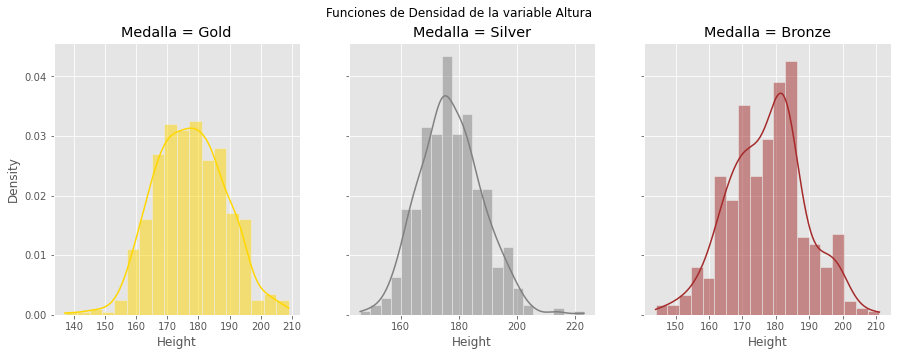

In [62]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle('Funciones de Densidad de la variable Altura')
axes[0].set_title("Medalla = Gold")
sns.histplot(ax= axes[0], data = data1, stat="density", kde = True,color="gold")
axes[1].set_title("Medalla = Silver")
sns.histplot(ax= axes[1], data = data2,stat="density", kde = True, color="grey")
axes[2].set_title("Medalla = Bronze")
sns.histplot(ax= axes[2], data = data3, stat="density", kde = True, color="brown")

##### El resultado del test ANOVA proporciona un p-value superior al nivel de significación, por lo que se acepta la hipótesis de igualdad de distribución de la variable Altura entre los atletas con medallas de oro, plata y bronze.

# Test Adicionales

#### D. NONPARAMETRIC STATISTICAL HYPOTHESIS TEST 

#### D.1 Mann-Whitney U Test

La U de Mann-Whitney (también llamada de Mann-Whitney-Wilcoxon, prueba de suma de rangos Wilcoxon, o prueba de Wilcoxon-Mann-Whitney) es una prueba no paramétrica aplicada a dos muestras independientes.
Es la versión no paramétrica de la habitual prueba t de Student y se usa para comprobar la heterogeneidad de dos muestras ordinales.
##### Vamos a selecionar muestras para comparar las distribuciondes de la Edad entre atletas masculinos y femeninos.

In [63]:
df=df_atletas_ok["Age"]
simple_rand_popAge = df.sample(500, replace=True, random_state=124)
data= df_atletas_ok.loc[:,'Sex'] == 'M'
df= df_atletas_ok.Age.loc[data]
simple_rand_menAge = df.sample(500, replace=True, random_state=124)

In [64]:
print("=======================")
print("  Mann-Whitney U Test  ")
print("=======================")
from scipy.stats import mannwhitneyu

data1 = simple_rand_popAge
data2 = simple_rand_menAge
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

  Mann-Whitney U Test  
stat=116387.000, p=0.059
Probably the same distribution


#### D.1. a) Gráfico de datos: Comparación de distribuciones de la Edad sin separar por Sexo y separando por Sexo = Masculino

<AxesSubplot:title={'center':'Sex = M'}, xlabel='Age', ylabel='Density'>

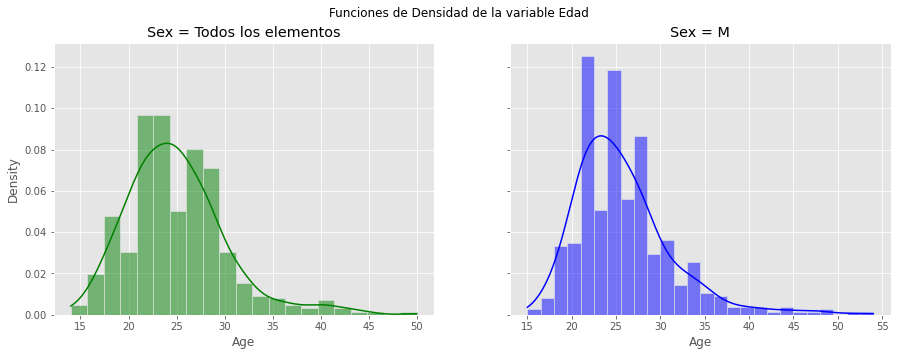

In [65]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Funciones de Densidad de la variable Edad')
axes[0].set_title("Sex = Todos los elementos")
sns.histplot(ax= axes[0], data = data1, stat ="density", kde = True, color="green")
axes[1].set_title("Sex = M")
sns.histplot(ax= axes[1], data = data2, stat ="density", kde = True, color="blue")

##### El p-value del test facilita un valor que permite acepta la hipótesis de que las distribuciones de las edades de las dos muestras se corresponden con la misma distribución de probabilidad, lo que tiene sentido ya que el numero de la muestra de atletas masculinos tiende a ser más numeroso.

#### D.2 Wilcoxon Signed-Rank Test

In [66]:
data= df_atletas_ok.loc[:,'Sex'] == 'F'
df= df_atletas_ok.Age.loc[data]
simple_rand_femAge = df.sample(500, replace=True, random_state=124)

In [67]:
print("=============================")
print("  Wilcoxon Signed-Rank Test  ")
print("=============================")
from scipy.stats import wilcoxon
data1 = simple_rand_popAge
data2 = simple_rand_femAge
stat, p = wilcoxon(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')


  Wilcoxon Signed-Rank Test  
stat=42403.500, p=0.000
Probably different distributions


#### D.2. a) Gráfico de datos: Comparación de distribuciones de la Edad sin separar por Sexo y separando por Sexo = Femenino

<AxesSubplot:title={'center':'Sex = F'}, xlabel='Age', ylabel='Density'>

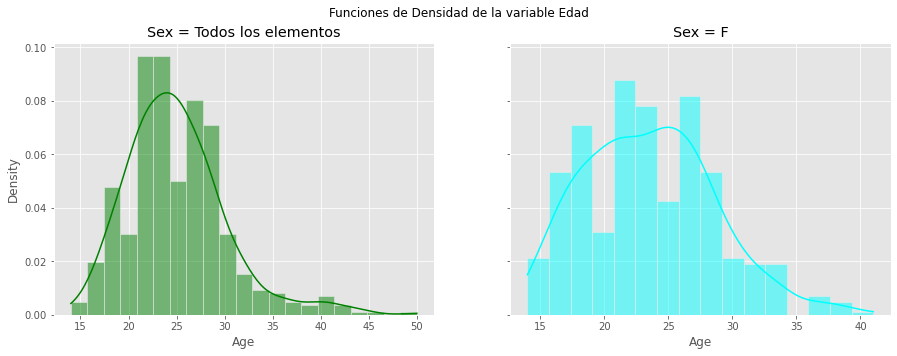

In [68]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Funciones de Densidad de la variable Edad')
axes[0].set_title("Sex = Todos los elementos")
sns.histplot(ax= axes[0], data = data1, stat ="density", kde = True, color="green")
axes[1].set_title("Sex = F")
sns.histplot(ax= axes[1], data = data2, stat ="density", kde = True, color="cyan")

##### En este caso, el p-value del test facilita un valor que no permite aceptar la hipótesis de que las distribuciones de las edades de las dos muestras se corresponden con la misma distribución de probabilidad y es por la razón contraria al anterior caso, ya que el colectivo de atletas femeninas es inferior.

#### D.3 Kruskal-Wallis H Test

El test de Kruskal-Wallis, también conocido como test H, es la alternativa no paramétrica al test ANOVA para datos no pareados. Se trata de una extensión del test de Mann-Whitney para más de dos grupos. Es por lo tanto de un test que emplea rangos para contrastar la hipótesis de que k muestras han sido obtenidas de una misma población.

A diferencia del ANOVA en el que se comparan medias, el test de Kruskal-Wallis contrasta si las diferentes muestras están equidistribuidas y que por lo tanto pertenecen a una misma distribución (población). Bajo ciertas simplificaciones puede considerarse que el test de Kruskal-Wallis compara las medianas.

In [69]:
data= df_atletas_ok.sample(500, replace=True, random_state=261)

##### En este caso vamos a comprar si la altura de los atletas de los juegos de invierno y verano pertenecen a la misma población

In [70]:
print("=========================")
print("  Kruskal-Wallis H Test  ")
print("=========================")
#from scipy.stats import kruskal
winter= data.loc[:,'Season'] == 'Winter'
data1 = data.Height.loc[winter]
summer= data.loc[:,'Season'] == 'Summer'
data2 = data.Height.loc[summer]
stat, p = kruskal(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

  Kruskal-Wallis H Test  
stat=7.308, p=0.007
Probably different distributions


#### D.3. a) Gráfico de datos: Comparación de distribuciones de la Altura por Season (Juegos de Invierno y Verano)

<AxesSubplot:title={'center':'Season = Summer'}, xlabel='Height', ylabel='Density'>

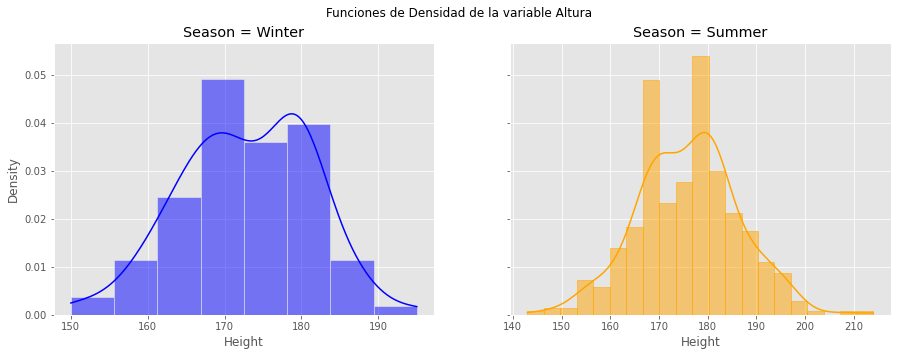

In [71]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Funciones de Densidad de la variable Altura')
axes[0].set_title("Season = Winter")
sns.histplot(ax= axes[0], data = data1, stat="density", kde = True, color ="blue")
axes[1].set_title("Season = Summer")
sns.histplot(ax= axes[1], data = data2, stat="density", kde = True, Color ="orange")

##### En este caso, el p-value del test facilita un valor que no permite aceptar la hipótesis de que las distribuciones de las alturas de las dos muestras, se corresponden con la misma distribución de probabilidad y por lo tanto, se trata de funciones diferentes.